**Preprocessing**

In [0]:
import numpy as np
import pandas as pd
import csv
from tqdm import tqdm
import math
import seaborn as sns
import matplotlib.pyplot as plt

**1. Ionoshpere Dataset**

In [0]:
#get the class distributions of dataset
df = pd.read_csv("ionosphere.csv", header=None)
classifcationIndex = (len(df.keys())-1)
ionosphereClassifications = df[classifcationIndex].to_numpy()
ionosphereFeatures        = df.drop([classifcationIndex],axis=1).to_numpy()

data_statistics = { "total_entries":( ionosphereClassifications.size ) }
data_statistics["number_of_good_entries"] = 0
data_statistics["number_of_bad_entries"] = 0
for i in range(ionosphereClassifications.size):
  if( ionosphereClassifications[i] == "g" ):
    data_statistics["number_of_good_entries"] = data_statistics["number_of_good_entries"] + 1
  else:
    data_statistics["number_of_bad_entries"] = data_statistics["number_of_bad_entries"] + 1
data_statistics["ratio_of_good_to_all_entries"] = data_statistics["number_of_good_entries"]/data_statistics["total_entries"]
data_statistics["ratio_of_bad_to_all_entries"] = data_statistics["number_of_bad_entries"]/data_statistics["total_entries"]

print("The number of data entries is : %i" %data_statistics["total_entries"])
print("The number of good data entries is : %i" %data_statistics["number_of_good_entries"] )
print("The number of bad data entries is %i: " %data_statistics["number_of_bad_entries"] )
print("The probability of randomly getting a good output based is : %3.1f" %(data_statistics["ratio_of_good_to_all_entries"]*100) )
print("The probability of randomly getting a bad output based is : %3.1f" %(data_statistics["ratio_of_bad_to_all_entries"]*100) )

The number of data entries is : 351
The number of good data entries is : 225
The number of bad data entries is 126: 
The probability of randomly getting a good output based is : 64.1
The probability of randomly getting a bad output based is : 35.9


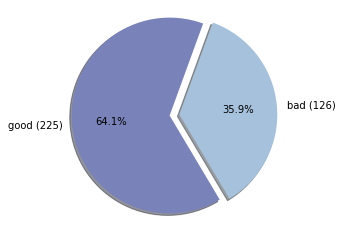

In [0]:
#plot the class distribution pie chart to have a better visualization
labels = 'good (225)', 'bad (126)'
sizes = [225,126]
colors = ['#7982B9','#A5C1DC']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode, labels, colors, autopct = '%1.1f%%', shadow = True, startangle = 70)
plt.axis('equal')
plt.savefig("ionosphere_number.png")

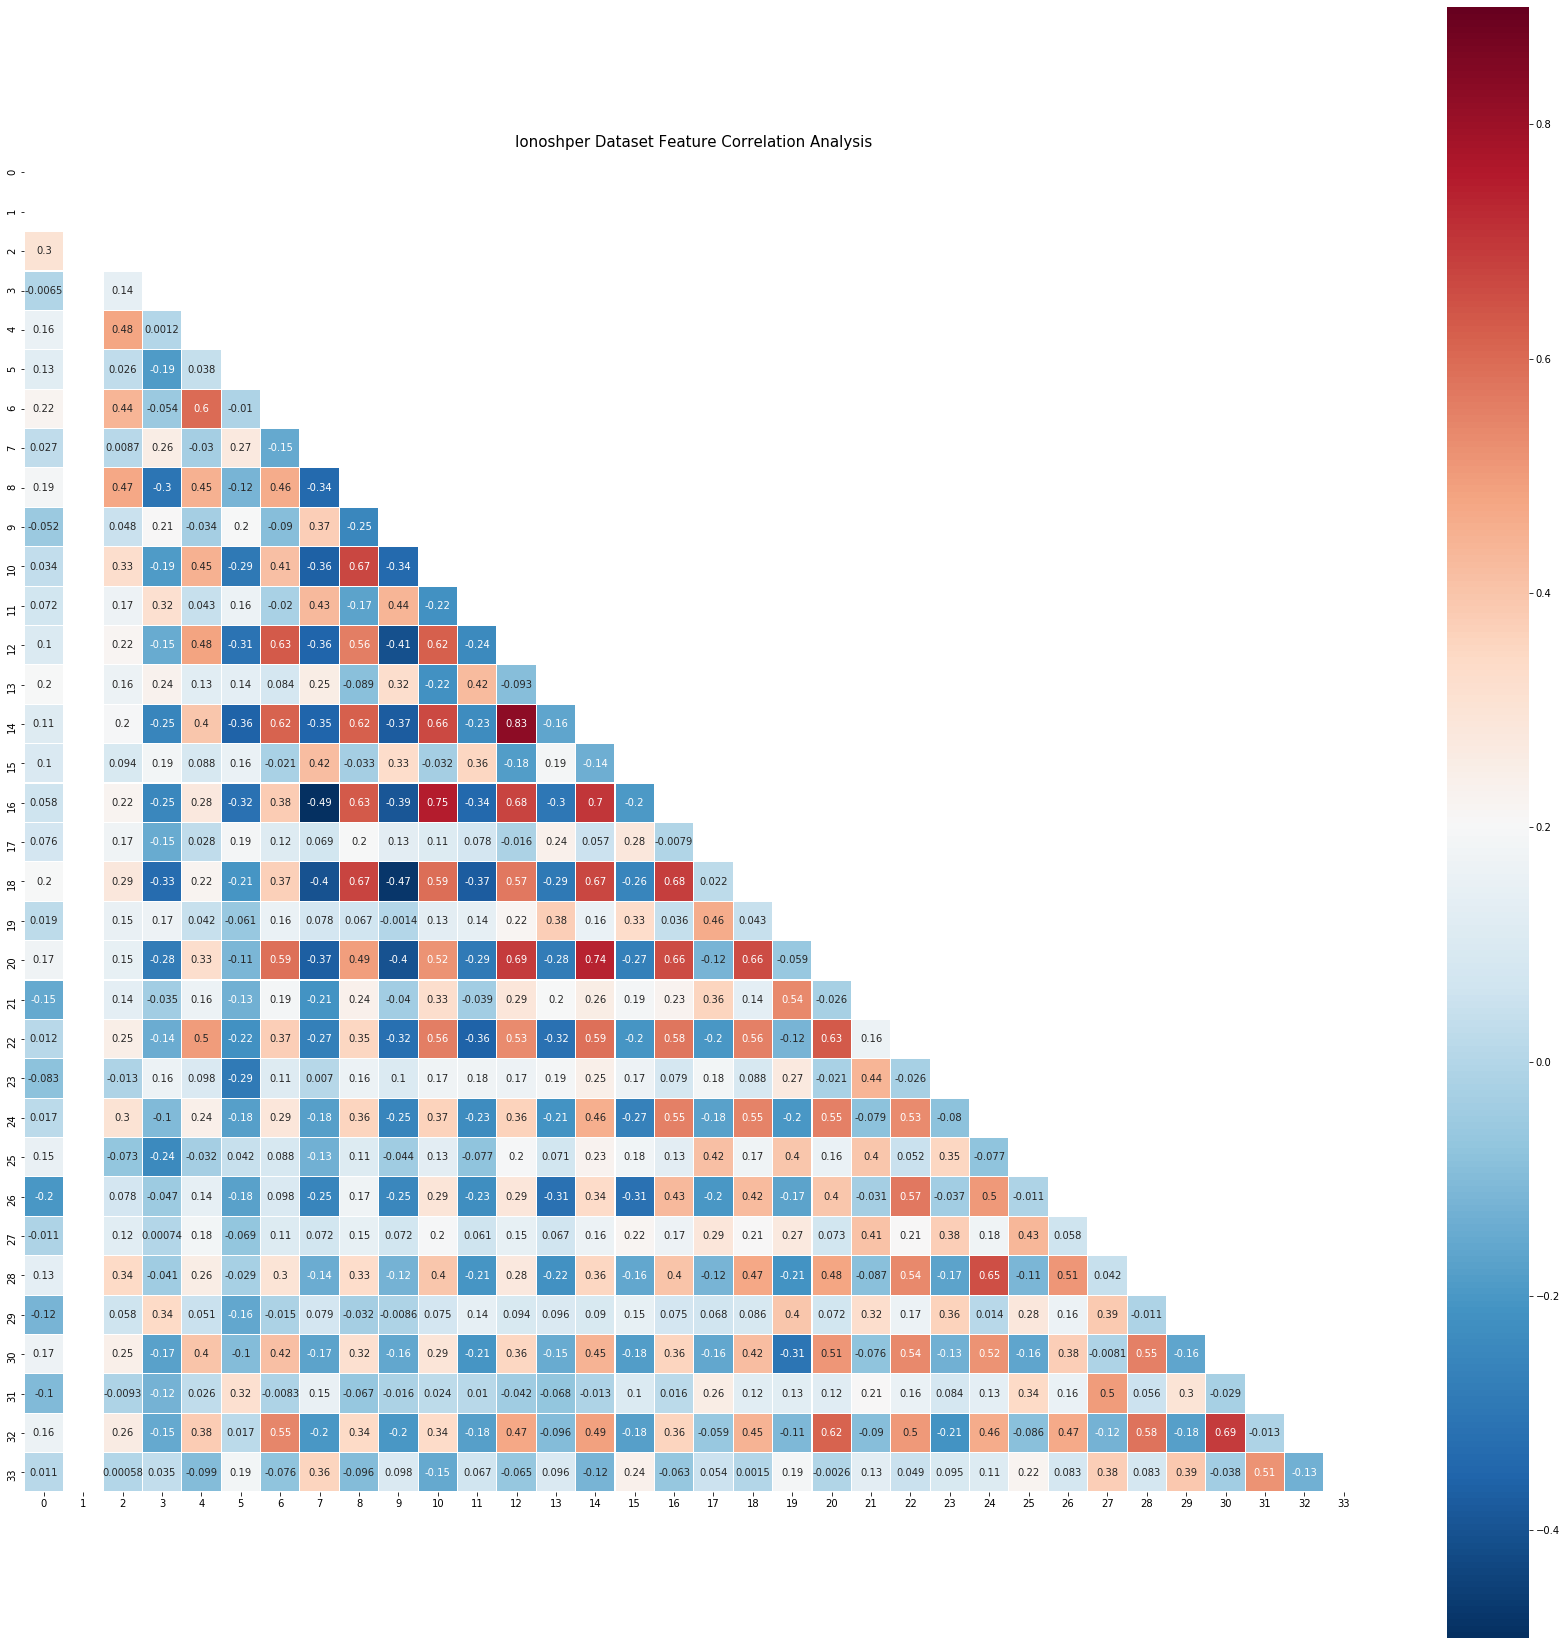

In [0]:
#correlation
df = pd.DataFrame(df,columns=df.columns)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (30,30))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            #vmin = .1,
            square=True)
plt.title("Ionoshper Dataset Feature Correlation Analysis", y = 2,fontsize = 15)
plt.savefig("ionoshper_correlation.png")

**2. Adult Dataset**

In [0]:
adults_header = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"] # with label header

df = pd.read_csv('adult.data', header=None)
#df.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]
print("Dataframe instantiated with " + str(df.size) + " elements in " + str(df[0].size) + " instances.")

Dataframe instantiated with 488415 elements in 32561 instances.


In [0]:
#This Cleans the dataframe of instances with " ?" elements
numberOfFeatures = df.keys().size
questionMarks = 0;
for i in range(numberOfFeatures):
  indices_to_delete = list()
  for j in range( df[i].size ):
    if( df[i][j] == " ?" ):
      questionMarks += 1
      indices_to_delete.append(j)
  df = df.drop( indices_to_delete , axis=0)
  df = df.reset_index(drop=True)
print("Dataframe instantiated with " + str(df.size) + " elements in " + str(df[0].size) + " instances.")

Dataframe instantiated with 452430 elements in 30162 instances.


In [0]:
#remove duplicate values
df.drop_duplicates(keep='first', inplace= True)
df = df.reset_index(drop=True)
len(df)
df

df.to_csv(r'C:\Users\14844\Desktop\export_dataframe.csv')

In [0]:
#get positive and negative classes
pos_index = 0;
neg_index = 0;
for i in range(df[0].size):
    if df[14][i] == " >50K":
      pos_index += 1
    else:
      neg_index += 1
print(pos_index)
print(neg_index)

7506
22633


In [0]:
#add header
df.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')


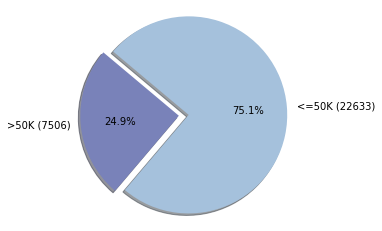

In [0]:
labels = '>50K (7506)', '<=50K (22633)'
sizes = [7506,22633]
colors = ['#7982B9','#A5C1DC']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode, labels, colors, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.savefig("adults_number.png")

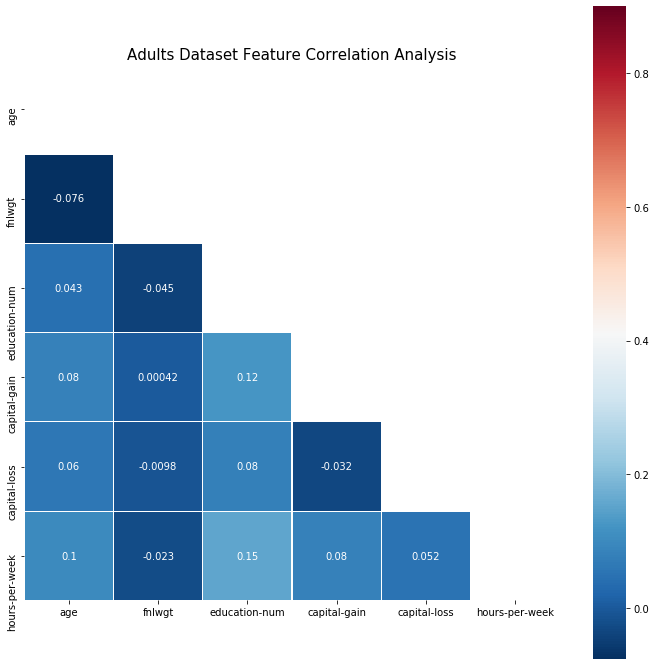

In [0]:
#correlation graph of adult
df = pd.DataFrame(df,columns=df.columns)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (12,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            #vmin = .1,
            square=True)
plt.title("Adults Dataset Feature Correlation Analysis", y = 2,fontsize = 15)
plt.savefig("adults_corr.png")

**3. White Wine Dataset**

In [0]:
#get number of data entried in the dataset
with open("winequality-white.csv", 'r') as f:
    wines = list(csv.reader(f, delimiter=";"))

wines_header = np.array(wines[0])  # with label header
wines = np.array(wines[1:], dtype=np.float) 
len(wines)

4898

In [0]:
# clean mal or missed values 
for i in range(len(wines)):
    for value in wines[i]:
        if math.isnan(value):
            np.delete(wines,i,0)

In [0]:
#change the multi class into binary by splitting 1-10 into 1-5 and 6-10
for i in tqdm(range(len(wines[:,-1]))):
    if wines[:,-1][i] > 5:
        wines[:,-1][i] = 1
    else:
        wines[:,-1][i] = 0

100%|██████████| 4898/4898 [00:00<00:00, 376692.91it/s]


In [0]:
#get positive and negative class numbers
pos_index = []
neg_index = []
for index in range(len(wines)):
    if wines[index][-1] == 1:
        pos_index.append(index)
    else:
        neg_index.append(index)

pos_wines = wines[pos_index]
neg_wines = wines[neg_index]
print(len(neg_wines))
print(len(pos_wines))

1640
3258


1640
3258


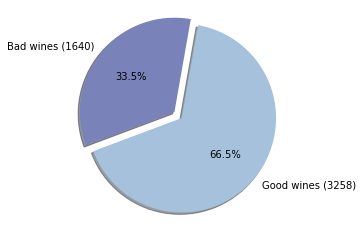

In [0]:
#distribution pie chart
pos_wines = wines[pos_index]
neg_wines = wines[neg_index]
print(len(neg_wines))
print(len(pos_wines))

labels = 'Bad wines (1640)', 'Good wines (3258)'
sizes = [1640,3258]
colors = ['#7982B9','#A5C1DC']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle = 80)

plt.axis('equal')
plt.savefig("wines_number.png")

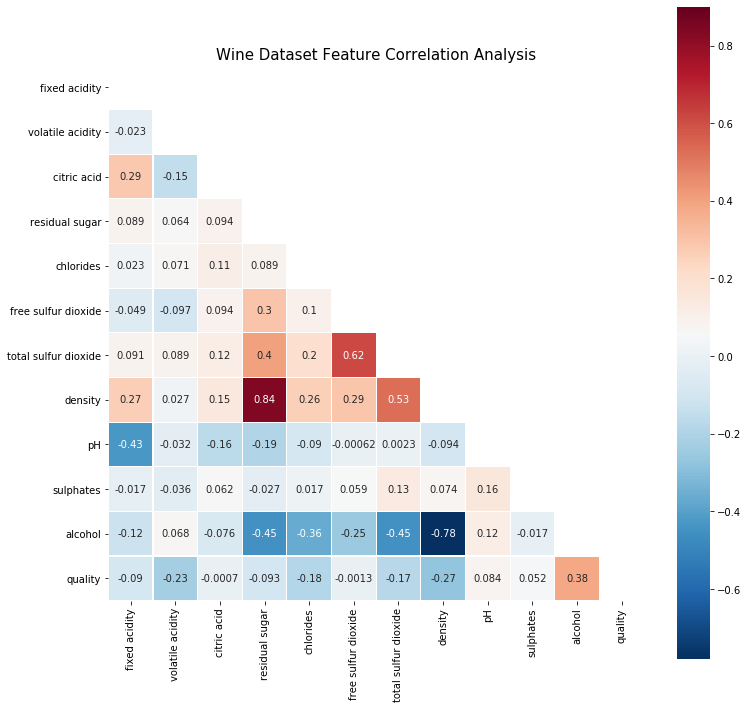

In [0]:
#correlation graph
df = pd.DataFrame(wines,columns=wines_header)
#df.describe().to_csv("pos_wines.csv")
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (12,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Wine Dataset Feature Correlation Analysis", y = 0.5,fontsize = 15)
plt.savefig("wines_correlation.png")

**4. Breast Cancer Wisconsin(Diagonalstic) Dateset**

In [0]:
# breast-cancer-wisconsin
with open("breast-cancer-wisconsin.csv", 'r') as f:
    cancer = list(csv.reader(f, delimiter=";"))
    
cancer_header = ["id","clump thickness","cell size","cell shape","marginal adhesion",\
                 "single epithelial cell size","number of bare nuclei","bland chromatin",\
                 "number of normal nuclei","mitosis","class"] # with label header
invalid_index = []
for i in tqdm(range(len(cancer))):
    cancer[i] = cancer[i][0].split(",")
    for j in range(len(cancer[i])):
        if cancer[i][j].isnumeric() == False:
            invalid_index.append(i)    #the whole row
    if int(cancer[i][-1]) <= 2:
        cancer[i][-1] = '0'
    else:
        cancer[i][-1] = '1'
       
invalid_index.sort(reverse=True)

for i in invalid_index:
    cancer.remove(cancer[i])

cancer = np.array(cancer[0:],dtype=np.int)

# Here is the place to return the numpy array to model trainers
print(cancer_header)


100%|██████████| 699/699 [00:00<00:00, 115339.65it/s]

['id', 'clump thickness', 'cell size', 'cell shape', 'marginal adhesion', 'single epithelial cell size', 'number of bare nuclei', 'bland chromatin', 'number of normal nuclei', 'mitosis', 'class']


444
239


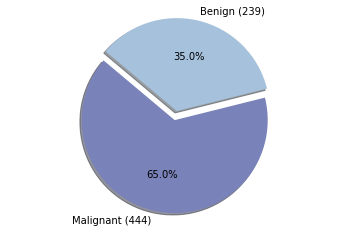

In [0]:
#get positive and negative class numbers
pos_index = []
neg_index = []
for index in range(len(cancer)):
    if cancer[index][-1] == 1:
        pos_index.append(index)
    else:
        neg_index.append(index)

pos_cancer = cancer[pos_index]
neg_cancer = cancer[neg_index]
print(len(neg_cancer))
print(len(pos_cancer))


labels = 'Malignant (444)', 'Benign (239)'
sizes = [444,239]
colors = ['#7982B9','#A5C1DC']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig("cancer_number.png")

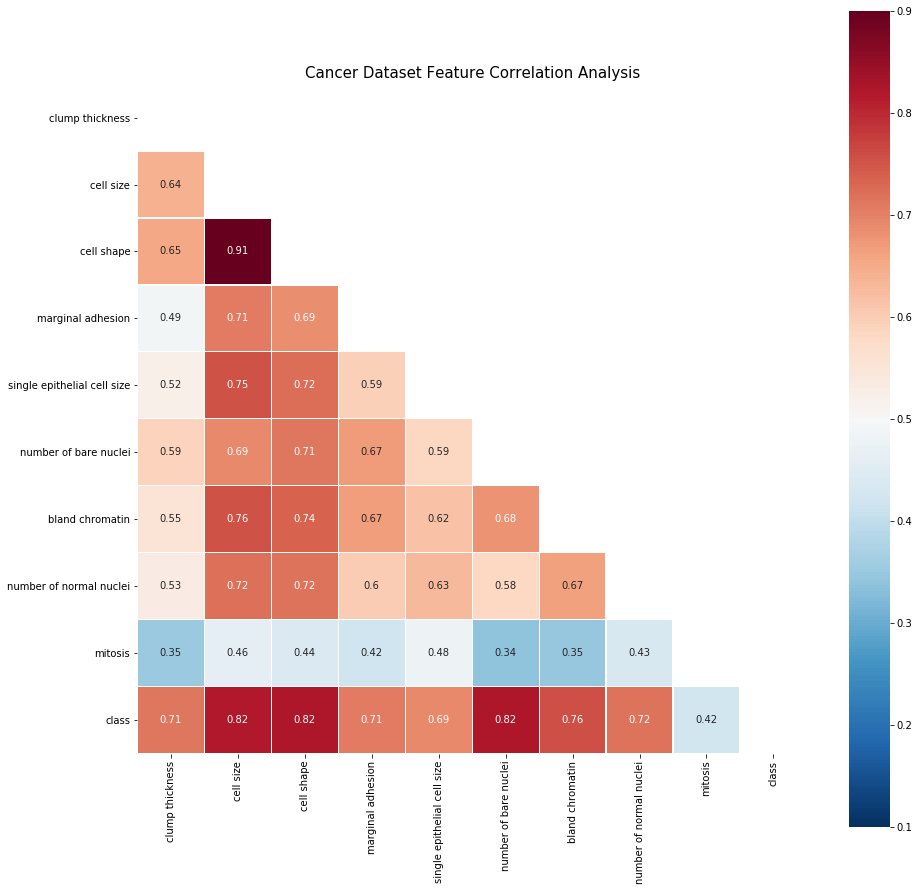

In [0]:
#correlation
df = pd.DataFrame(cancer[:,1:],columns=cancer_header[1:])
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            vmin = .1,
            square=True)
plt.title("Cancer Dataset Feature Correlation Analysis", y = 1.03,fontsize = 15)
plt.savefig("cancer_correlation.png")